In [93]:
import pandas as pd

import matplotlib
matplotlib.use("TkAgg")

import matplotlib.pyplot as plt
import numpy as np


from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('../Sim/caseArrival/correct_case_arrivals.csv')


df['day'] = pd.to_datetime(df['day'] ,utc = True)

df.set_index('day', inplace=True)
df = df.sort_index()

df= df['2022-12-01':][:'2025-01-15':]


plot_series = df['event_count'].replace(0, np.nan)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.index, plot_series, linestyle='-', marker=None)
ax.set_ylabel("event_count")
ax.set_xlim(df.index.min(), df.index.max())
plt.show()

train = df[:'2024-12-30']
test = df['2024-12-31':][:'2025-01-15':]




print(df.tail())

                           event_count
day                                   
2025-01-09 23:00:00+00:00          275
2025-01-12 23:00:00+00:00          259
2025-01-13 23:00:00+00:00          281
2025-01-14 23:00:00+00:00          294
2025-01-15 23:00:00+00:00          278


In [94]:
import seaborn as sns

sns.lineplot(x = df.index,y='event_count',data=df)

plt.show()

In [29]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train['event_count'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['event_count'])
plt.show()


In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['event_count'])
plt.show()

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['event_count'],period=31)
decomposition.plot()
plt.show()

# from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['event_count'],period=365)
decomposition.plot()
plt.show()

In [9]:
res = seasonal_decompose(df['event_count'], model='additive', period=7)

# 2. Plot the ACF of the residual (trend- and seasonality-removed)
plot_acf(res.resid.dropna(), lags=28)
plt.show()

In [ ]:
import pmdarima as pmd

model=pmd.auto_arima(df['event_count'],start_p=1,start_q=1,test='adf',m=7,seasonal=True,trace=True)

Performing stepwise search to minimize aic


c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_

In [99]:
sarima=SARIMAX(train['event_count'],order=(1,1,2),seasonal_order=(1,1,1,7))
fitted_model = sarima.fit()


c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [108]:
forecast = fitted_model.get_forecast(steps=len(test))
predicted = forecast.predicted_mean
confidence_int = forecast.conf_int()

c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test['event_count'], predicted)
mae = mean_absolute_error(test['event_count'], predicted)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MSE: 9045.40
MAE: 90.88
RMSE: 95.11


In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train.index, train['event_count'], label='Train')
plt.plot(test.index, test['event_count'], label='Actual', color='black')
plt.plot(test.index, predicted, label='Predicted', color='orange')
plt.fill_between(test.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], 
                 color='orange', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.tight_layout()
plt.show()



In [69]:
residuals = fitted_model.resid
residuals.plot(title="SARIMA Residuals", figsize=(10, 4))
plt.show()


In [73]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

You should consider upgrading via the 'C:\Users\Mikke\PycharmProjects\masterSim\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [74]:
SARIMA_model = pm.auto_arima(df["event_count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\mikke\pycharmprojects\mastersim\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_

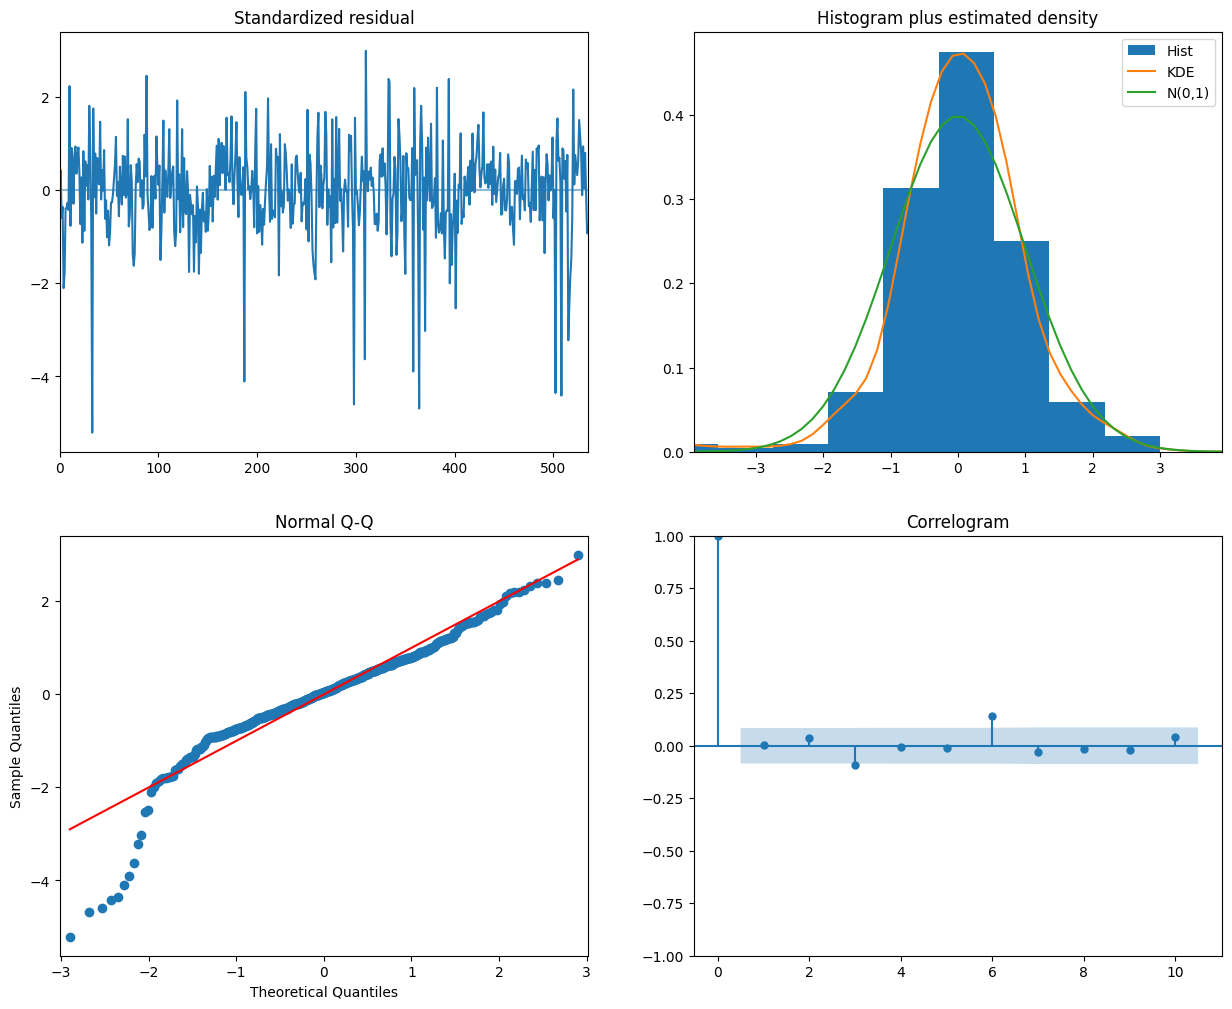

In [75]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [81]:
SARIMA_model

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model = SARIMAX(